<a href="https://colab.research.google.com/github/yuvalwas/MDAN-course/blob/main/MDAN_T6_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#hidden
#@title Imports  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import seaborn as sns
from sklearn.decomposition import PCA

plt.rcParams['figure.dpi'] = 150
plt.rcParams['legend.frameon'] = False



In [91]:
#hidden
#@title Plotting utils
def center_axes(ax):
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_visible(False)
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

def hide_axes(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x)-1)
    if z.shape == x.shape:
        z = z[:-1] # there are n-1 segments from n points

    assert len(z) == len(x)-1

    z = np.asarray(z)
    segments = make_segments(x, y)
    lc = mcoll.LineCollection(
        segments, array=z, cmap=cmap, **kwargs)
    ax.add_collection(lc)
    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

In [92]:
#hidden
#@title Download data
!wget -O data_for_pca.npy https://www.dropbox.com/s/7sbqeegf390zdys/data_for_pca.npy?dl=0

--2023-05-01 21:15:48--  https://www.dropbox.com/s/7sbqeegf390zdys/data_for_pca.npy?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7sbqeegf390zdys/data_for_pca.npy [following]
--2023-05-01 21:15:48--  https://www.dropbox.com/s/raw/7sbqeegf390zdys/data_for_pca.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc41f018f0a02edf02f51cac9b77.dl.dropboxusercontent.com/cd/0/inline/B7OR8krqu4X1Mzuv7xQpYCh0cFO6sVL1GyhvZTpgbWo3OJaiVV-DJhQWu_M4I2oL8_cMHuq-tZzXPnhJeC62W0MevjbZj5xiF3FhD6cj843dgAZExfuFGIyHVF8Kd56ooQbAw3rtXcoMvk2XBnzuka8GOCWK4-3LLJbLIrSgi6fgnA/file# [following]
--2023-05-01 21:15:48--  https://uc41f018f0a02edf02f51cac9b77.dl.dropboxusercontent.com/cd/0/inline/B7OR8krqu4X1Mzuv7xQpYCh0cFO6sVL1GyhvZTpgbWo3OJaiVV-DJhQWu_M4

In [93]:
N = 100
P = 2

data = np.random.randn(N, P)
P = np.array([[ 10*0.80291994, 10*0.59608688],
       [ 2*-0.59608688, 2*0.80291994]])
data = data @ P + np.array([100, -100])

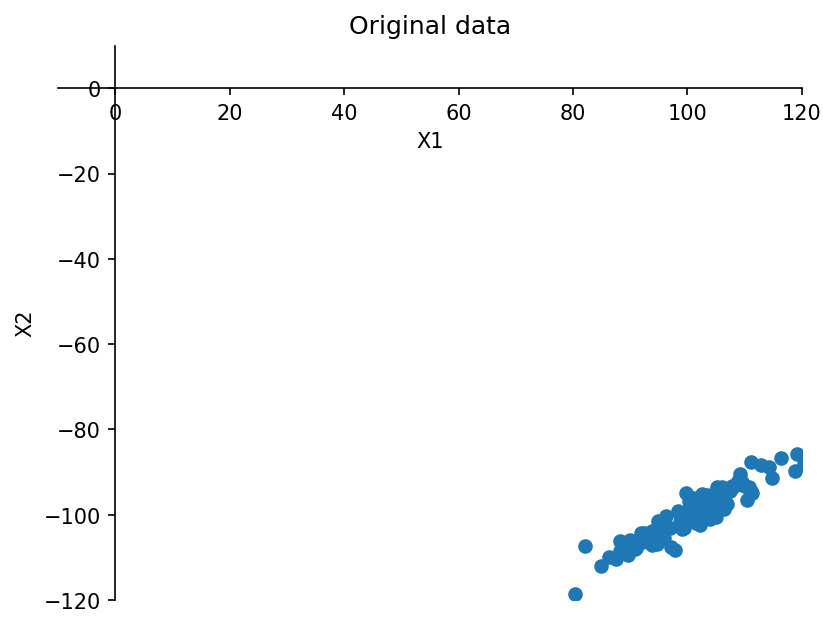

In [94]:
ax = plt.gca()
ax.scatter(*data.T)
center_axes(ax)
ax.set(xlim=[-10, 120], ylim=[-120, 10], title='Original data', xlabel='X1', ylabel='X2');

1. Center the data (preliminary step)

In [95]:
X = data - data.mean(axis=0)

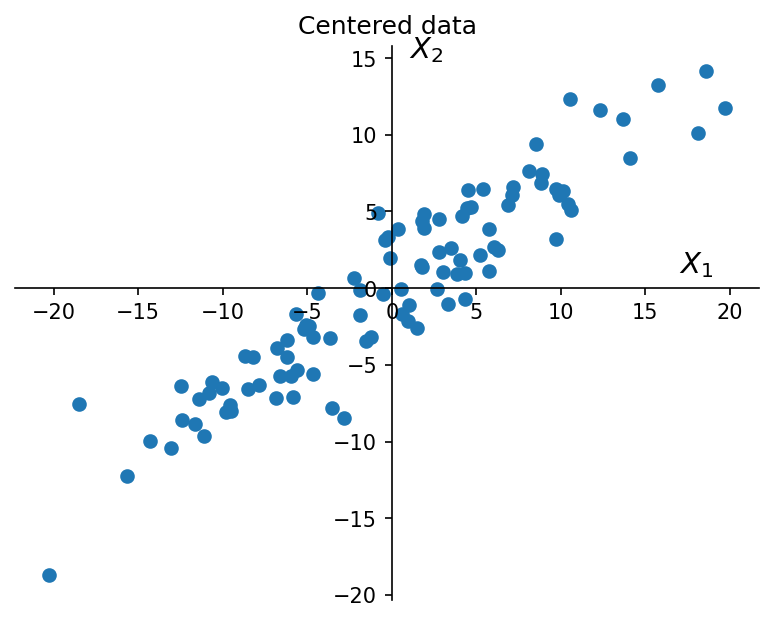

In [96]:
plt.scatter(*X.T)
ax = plt.gca()
center_axes(ax)
plt.title('Centered data')
plt.annotate('$X_1$', (17, 1), fontsize=14)
plt.annotate('$X_2$', (1, 15), fontsize=14);

Let's look at the covariance matrix:

In [97]:
cov = X.T @ X / N # this is equivalent to `np.cov(X.T)`

- `X[0,0]` is the variance of $X_1$
- `X[1,1]` is the variance of $X_2$
- on the minor diagonal we have the covariance of $X_1$ and $X_2$

---
---
**What's covariance?** 😰 <br>
The covariance has a similar intuition as we have for (Pearson) correlation. In fact, coorelation is just the covariance, normalized by the standard deviations:
$$
r_{X_1,X_2} = \frac{\text{Cov}(X_1,X_2)}{\sigma_1 \sigma_2}
$$
A covariance of a variable with itself is its variance:
$$
\text{Cov}(X_1,X_1) = \text{Var}(X_1)
$$

---
---

**What do we do with the covariance matrix?**
We want to rotate our axes (change basis) such that most of the variance will lie on a single axis. If a pick an axis the captures the maximum variance a single axis can capture, this is PC1 (first principal component).


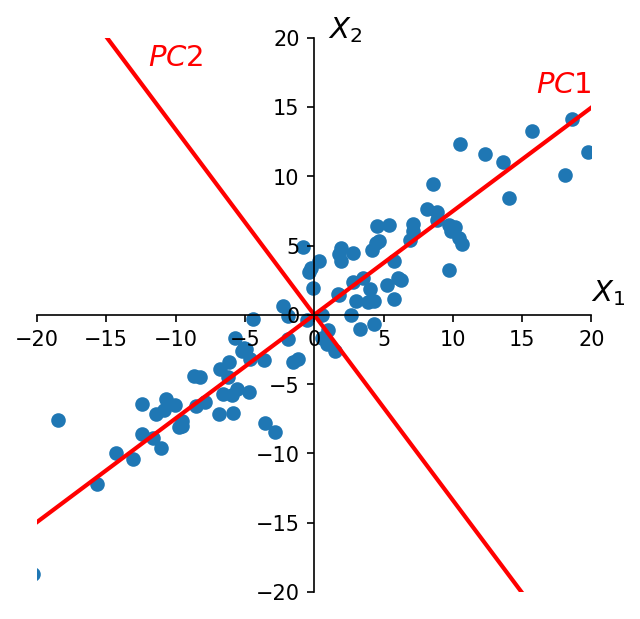

In [98]:
pca = PCA(n_components=2).fit(X)

plt.scatter(X[:,0], X[:,1])
ax = plt.gca()
ax.set_aspect('equal')
center_axes(ax)
plt.annotate('$X_1$', (20, 1), fontsize=14)
plt.annotate('$X_2$', (1, 20), fontsize=14)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

x1_grid = np.linspace(*plt.xlim(), 100)

PC1 = pca.components_[0]
PC2 = pca.components_[1]

slope1 = PC1[1]/PC1[0]
slope2 = PC2[1]/PC2[0]

plt.plot(x1_grid, slope1 * x1_grid, 'r', lw=2)
plt.plot(x1_grid, slope2 * x1_grid, 'r', lw=2)

plt.annotate('$PC1$', (16, 16), fontsize=14, color='red')
plt.annotate('$PC2$', (-12, 18), fontsize=14, color='red');

Please rotate your head such that the red axes are now horizontal and vertical. Notice that: 
1. PC1 indeed captures the maximum variance any one axis can
2. PC1 and PC2 have no covariance. If a single point is high on PC1, it is equally likely that it will be low or high on PC2.

How do we get this? We are basically requiring our PCA basis to have no covariance between its axes. We do this be diagonalizing the covariance matrix. Recall that in diagnoalization we find eigenvalues and eigenvectors. The eigenvectors are the new axes (the PCs). The eigenvalues are the variances of the new axes. The eigenvector that belongs to the largest eigenvalue is PC1 (because it has the most variance).

In fact, if we now recalculate the covariance matrix of the data in the new PCA basis, the covariance matrix would be the eigenvalue matrix. Let's call the original covariance matrix $C$, and the eigendecomposition of it is $Λ = U^TCU$. Call the data in the new basis $Y=U^TX$.
$$
\frac{1}{n}YY^T = \frac{1}{n} U^TXX^TU = U^TCU=\Lambda = 
\begin{pmatrix}
\lambda_1 & 0 \\ 0 & \lambda_2
\end{pmatrix} = \begin{pmatrix}
\text{Var}(\text{PC1}) & 0 \\ 0 & \text{Var}(\text{PC2})
\end{pmatrix}$$

Up until now we only rotated our axes, but did no dimensionality reduction. To reduce dimension, we're gonna discard axes (eigenvectors in $U$) that their variance is small (small eigenvalues).

# PCA on firing rates

In [99]:
neural_data = np.load('data_for_pca.npy')
neural_data.shape # time points X neurons

(501, 200)

What is the dimensionality of the space that the points are in now? (i.e. the data's dimensionality)

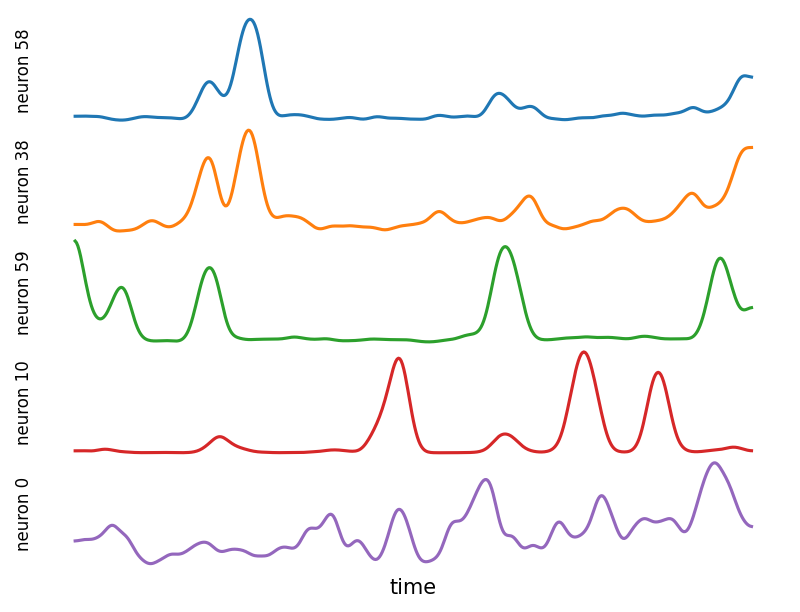

In [100]:
#hidden
#@title Firing rate of some example neurons
neuron_idx = [58, 38, 59, 10, 0]

fig, axs = plt.subplots(len(neuron_idx), sharex=True, gridspec_kw=dict(hspace=0))
for i, j in enumerate(neuron_idx): 
  axs[i].plot(neural_data[:, j], c=f'C{i}')
  hide_axes(axs[i])
  axs[i].set_ylabel(f'neuron {j}', fontsize=8);
axs[-1].set_xlabel('time');

In [101]:
pca = PCA(n_components=1).fit(neural_data)
scores = pca.transform(neural_data)
n_neurons = len(neuron_idx)
PC1 = pca.inverse_transform(scores)

We first look at the mean firing rate of neurons. Remember - PCA does not try to explain mean firing rates, only co-activities of neurons, i.e. how those firing rates change together across neurons.

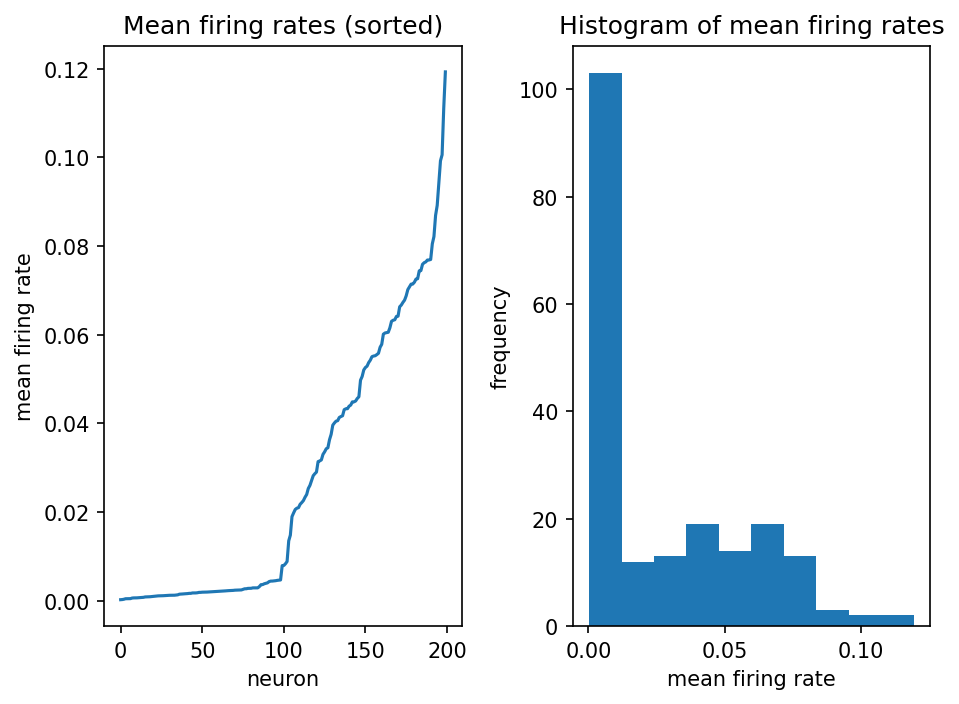

In [102]:
#@title view mean firing rates
ax = plt.subplot(121)
ax.plot(np.sort(pca.mean_))
ax2 = plt.subplot(122)
ax2.hist(pca.mean_)

ax.set(xlabel='neuron', ylabel='mean firing rate', title='Mean firing rates (sorted)')
ax2.set(xlabel='mean firing rate', ylabel='frequency', title='Histogram of mean firing rates')
plt.tight_layout()

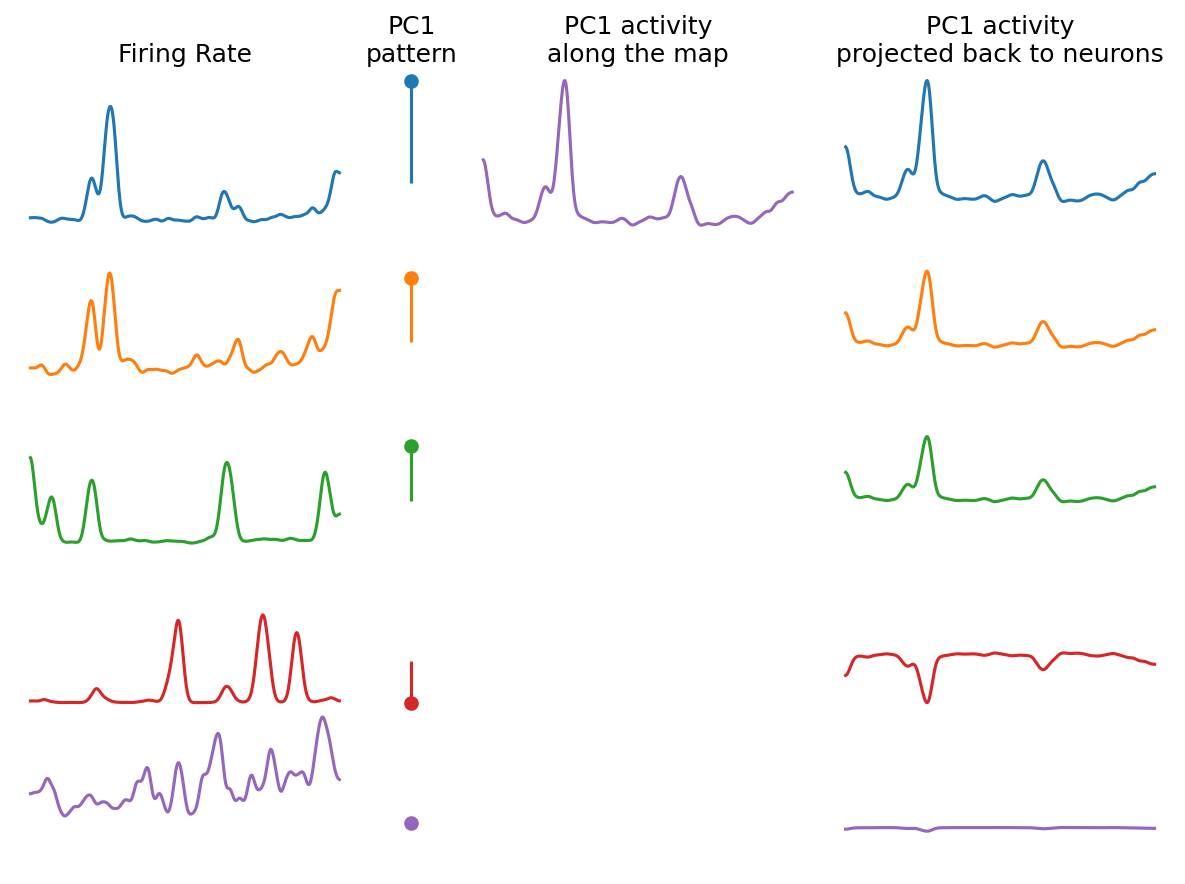

In [103]:
#hidden
#@title View PC1
fig, axs = plt.subplots(n_neurons, 4,  sharex='col', sharey='col',
                        width_ratios = [5,1,5,5],
                        gridspec_kw=dict(hspace=0),
                        figsize=(8, 6))
for i in range(n_neurons): 
  d = neural_data[:, neuron_idx[i]]
  axs[i, 0].plot(d / np.std(d), c=f'C{i}')
  axs[i, 0].axis('off')

  axs[i, 1].stem([pca.components_[0][neuron_idx[i]]], linefmt=f'C{i}')
  axs[i, 1].axis('off')
  axs[i, 1].set_xlim((-0.5, 0.5))

  axs[i, 2].axis('off')

  axs[i, 3].plot(PC1[:, neuron_idx[i]], c=f'C{i}')
  axs[i, 3].axis('off')

axs[0,2].plot(scores, c='C4')
axs[0,0].set_title('Firing Rate')
axs[0,1].set_title('PC1\npattern')
axs[0,2].set_title('PC1 activity\nalong the map')
axs[0,3].set_title('PC1 activity\nprojected back to neurons')
plt.tight_layout()


In [104]:
pca2 = PCA(n_components=1).fit(neural_data-PC1)
scores2 = pca2.transform(neural_data) # this is the data projected on PC2
PC2 = pca2.inverse_transform(scores)

In [105]:
# sanity check
# PC2 calculated over original data is equal to repeatedly calculating PC1 and removing what is explained by it
pca_validate = PCA(n_components=2).fit(neural_data)
np.allclose(pca_validate.components_[1], pca2.components_[0])

True

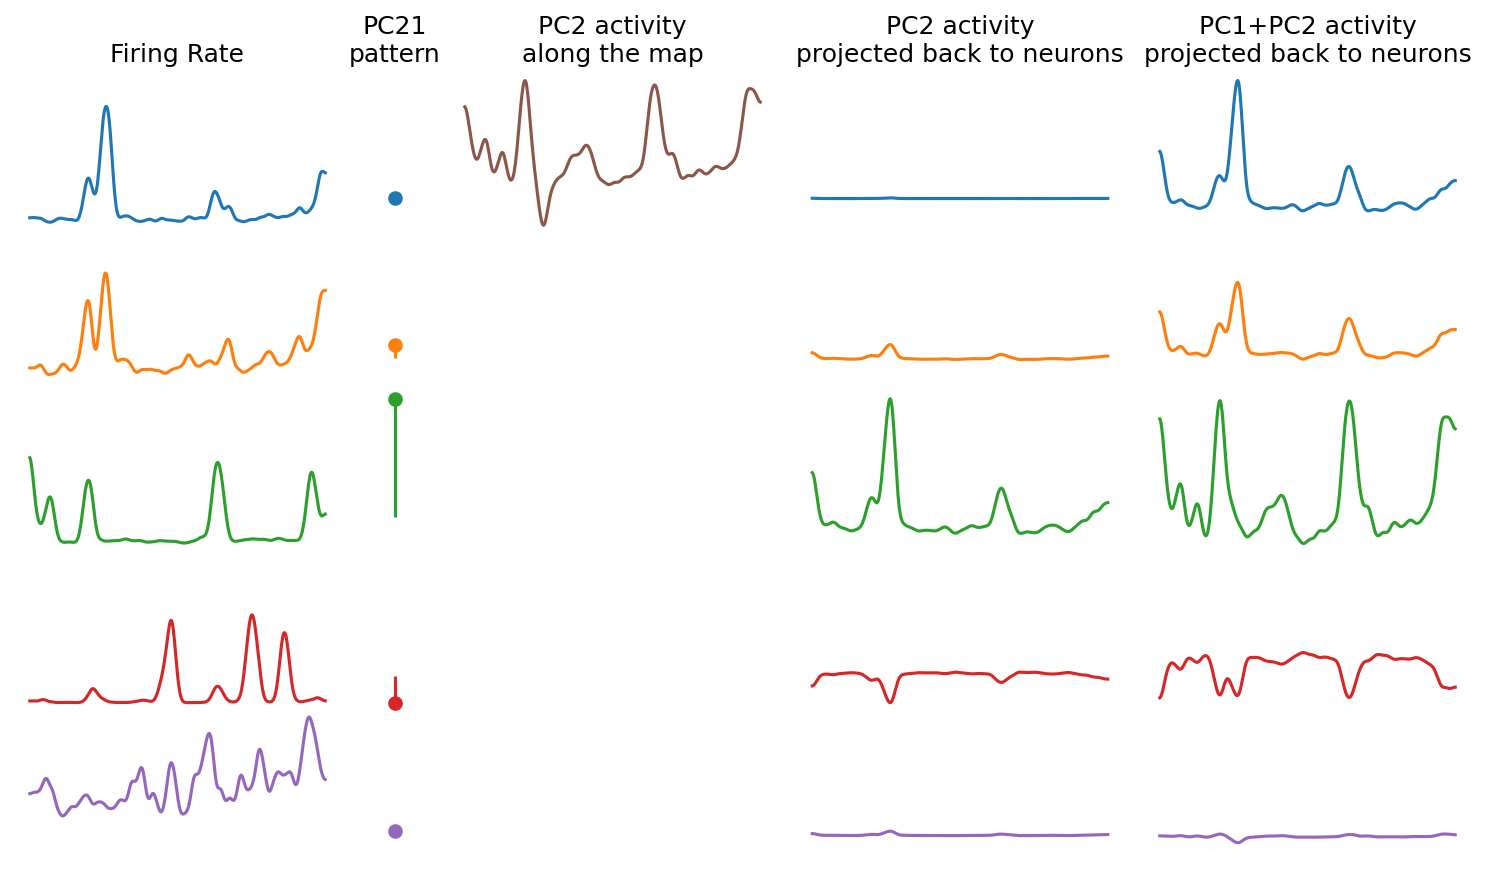

In [106]:
#hidden
#@title View PC2
fig, axs = plt.subplots(n_neurons, 5,  sharex='col', sharey='col',
                        width_ratios = [5, 1, 5, 5, 5],
                        gridspec_kw=dict(hspace=0),
                        figsize=(10, 6))

pca12 = PCA(n_components=2).fit(neural_data)
scores12 = pca12.transform(neural_data)
PC12 = pca12.inverse_transform(scores12)

for i in range(n_neurons): 
  d = neural_data[:, neuron_idx[i]]
  axs[i, 0].plot(d / np.std(d), c=f'C{i}')
  axs[i, 0].axis('off')

  axs[i, 1].stem([pca2.components_[0][neuron_idx[i]]], linefmt=f'C{i}')
  axs[i, 1].axis('off')
  axs[i, 1].set_xlim((-0.5, 0.5))

  axs[i, 2].axis('off')

  axs[i, 3].plot(PC2[:, neuron_idx[i]], c=f'C{i}')
  axs[i, 3].axis('off')

  axs[i, 4].plot(PC12[:, neuron_idx[i]], c=f'C{i}')
  axs[i, 4].axis('off')

axs[0,2].plot(scores2, c='C5')
axs[0,0].set_title('Firing Rate')
axs[0,1].set_title('PC21\npattern')
axs[0,2].set_title('PC2 activity\nalong the map')
axs[0,3].set_title('PC2 activity\nprojected back to neurons')
axs[0,4].set_title('PC1+PC2 activity\nprojected back to neurons')
plt.tight_layout()


Let's look at the PCs as new axes for the data

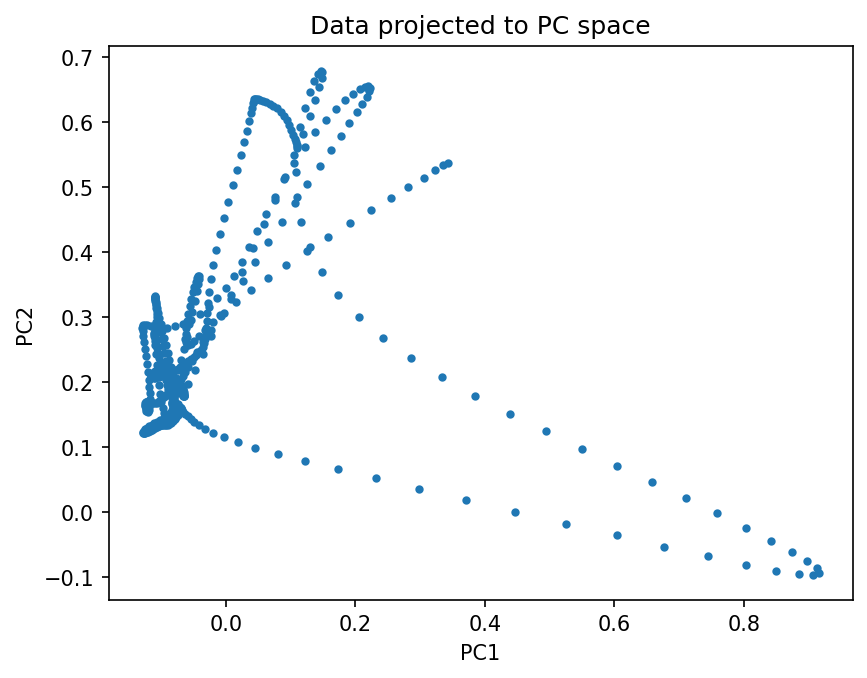

In [107]:
plt.plot(scores, scores2, '.')
plt.gca().set(xlabel='PC1', ylabel='PC2', title='Data projected to PC space');

Notice this is the same kind of plot we say at the [beginning](https://colab.research.google.com/drive/1U6gTx8AtI8zpk3aLafWFtHpEvFVYBGJ6#scrollTo=oGKDbJZiqRQ_&line=1&uniqifier=1) (PC2 vs PC1). Notice that unlike in that plot, here we cannot visualize the data points in the original high-dimensional space. 

Another difference is that here the points are a time series, i.e. they have an order. Let's connect the dots according to time and use color to view time:


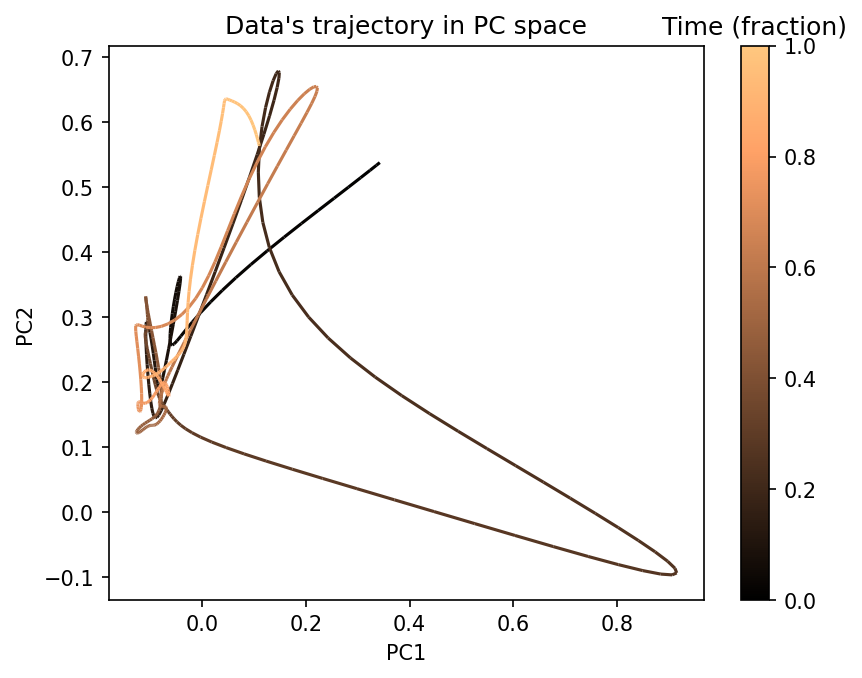

In [108]:
#hidden
#@title View projection as a trajectory
plt.plot(scores, scores2, 'w')
p = colorline(scores, scores2)
plt.colorbar(p).ax.set_title('Time (fraction)')
plt.gca().set(xlabel='PC1', ylabel='PC2', title="Data's trajectory in PC space");

Although we know the order of the data, and thus able to connect the dots, remember that __PCA has no concept of order in the data__, and it would return the same result had we shuffled the data (shuffled time points).

